In [ ]:
! pip install wordcloud
! pip install nltk

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

In [ ]:
train = pd.read_csv('/home/train.csv')
test = pd.read_csv('/home/test.csv')
submission = pd.read_csv('/home/sample_submission.csv')

In [ ]:
train.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

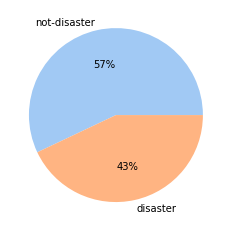

In [ ]:
data = [train.groupby(['target']).count()['id'][0], train.groupby(['target']).count()['id'][1]]
colors = sns.color_palette('pastel')
labels = ['not-disaster', 'disaster']
plt.pie(data, colors = colors,labels=labels,autopct = '%0.0f%%')
plt.show()

NETTOYAGE DES DONNEES

In [ ]:
train.replace(regex={'%20': ' '},inplace=True)

In [ ]:
train.replace(regex={r'https?://\S+': ' ',r'<.*?>':' ',r'\d+':' ',r'#\w+':' ','[^a-zA-Z]': ' ',r'http\S+': ' '},inplace=True)

STOPWORDS

In [ ]:
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
train['text'][2]
train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


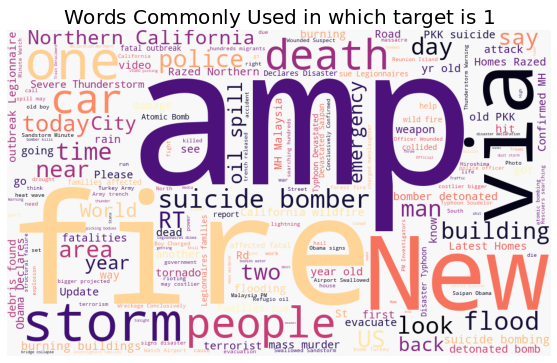

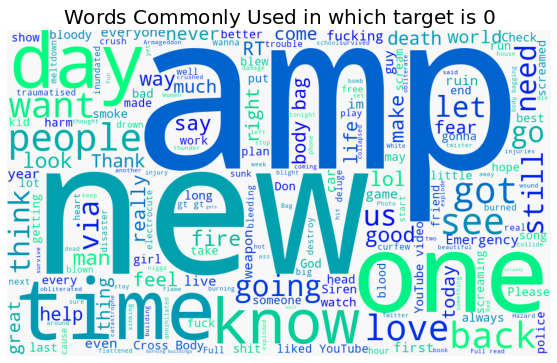

In [ ]:
#WordCloud for the Sentiments
for label, cmap in zip([1,0],
                       ['magma','winter']):
    text = train.query('target == @label')['text'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in which target is ${label}$", size=20)
    plt.show()

In [ ]:
train['text'][5]

'Update California Hwy closed directions due Lake County fire'

In [ ]:
vectorizer = TfidfVectorizer(ngram_range = (1,2))
X = vectorizer.fit_transform(train['text'])
target = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
target.shape

(7613, 62227)

In [ ]:
target

,aa,aa ayyo,aa batteries,aa mgm,aaaa,aaaa ok,aaaaaaallll,aaaaaaallll even,aaaaaand,aaaaaand thunder,...,zrnf,zss,zss vs,zumiez,zumiez location,zurich,zurich swiss,zxathetis,zxathetis are,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y=train['target']

In [ ]:
x_train, x_val, y_train, y_val= train_test_split(target, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [ ]:
print(x_train.shape)
print(x_val.shape)

(6851, 62227)
(762, 62227)


MODELE D'ENTRAINEMENT


In [ ]:
mlp=MLPClassifier(random_state=0, early_stopping=True, verbose=2)
mlp.fit(x_train, y_train)

Iteration 1, loss = 0.67016973


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.673469
Iteration 2, loss = 0.54182948


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.731778
Iteration 3, loss = 0.37326167


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.759475
Iteration 4, loss = 0.24250847


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.768222
Iteration 5, loss = 0.16222861


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.771137
Iteration 6, loss = 0.11652748


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.774052
Iteration 7, loss = 0.08956791


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.766764
Iteration 8, loss = 0.07310000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.768222
Iteration 9, loss = 0.06216329


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.768222
Iteration 10, loss = 0.05487103


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.766764
Iteration 11, loss = 0.04995684


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.771137
Iteration 12, loss = 0.04598720


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.772595
Iteration 13, loss = 0.04322148


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.766764
Iteration 14, loss = 0.04054166


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.768222
Iteration 15, loss = 0.03868627


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.768222
Iteration 16, loss = 0.03729355


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.765306
Iteration 17, loss = 0.03632413


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Validation score: 0.769679
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, random_state=0, verbose=2)

MLP Accuracy: 0.8097112860892388
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       435
           1       0.83      0.69      0.76       327

    accuracy                           0.81       762
   macro avg       0.82      0.80      0.80       762
weighted avg       0.81      0.81      0.81       762



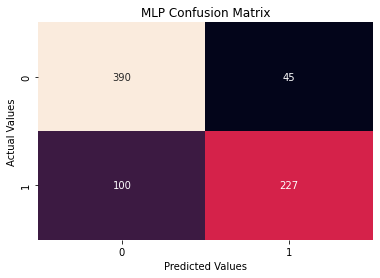

In [ ]:
y_pred_mlp=mlp.predict(x_val)
cm_mlp = confusion_matrix(y_val, y_pred_mlp)
print('MLP Accuracy:', accuracy_score(y_val, y_pred_mlp))
print(classification_report(y_val, y_pred_mlp))
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

In [ ]:
scaler = MinMaxScaler()
lr = LogisticRegression(solver='liblinear', random_state=777)
pipeline = Pipeline([('scale',scaler), ('lr', lr),])
pipeline.fit(x_train, y_train)
y_pred_lr = pipeline.predict(x_val)

In [ ]:
print ('Training f-1 score: %.4f' % f1_score(y_train, pipeline.predict(x_train)))

Training f-1 score: 0.9796


lr Accuracy: 0.7939632545931758
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       435
           1       0.83      0.65      0.73       327

    accuracy                           0.79       762
   macro avg       0.80      0.78      0.78       762
weighted avg       0.80      0.79      0.79       762



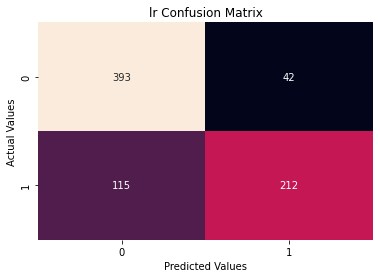

In [ ]:
cm_lr = confusion_matrix(y_val, y_pred_lr)
print('lr Accuracy:', accuracy_score(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))
sns.heatmap(cm_lr, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('lr Confusion Matrix')
plt.show()

SUBMISSION

In [ ]:
test.replace(regex={'%20': ' '},inplace=True)

In [ ]:
test.replace(regex={r'https?://\S+': ' ',r'<.*?>':' ',r'\d+':' ',r'#\w+':' ','[^a-zA-Z]': ' ',r'http\S+': ' '},inplace=True)
test['text'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))
X = vectorizer.transform(test['text'])
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_sub_pred_mlp=mlp.predict(X)
submission.target=y_sub_pred_mlp
submission.to_csv('/home/new_sample_submission.csv',index=False)
